In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load Data

In [2]:
df = pd.read_csv('downloads/worldhappiness2019.csv')

In [3]:
df.head()

,Happiness_level,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Very High,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,Very High,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,Very High,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,Very High,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,Very High,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
region_df = pd.read_csv('downloads/ISO-3166-Countries-with-Regional-Codes-master/all/all.csv')

In [5]:
region_df.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


### Merge DFs

In [6]:
merge_df = pd.merge(df, region_df, how='left', left_on='Country or region', right_on='name')

In [7]:
merge_df.head()

,Happiness_level,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Very High,Finland,1.340,1.587,0.986,0.596,0.153,0.393,Finland,FI,FIN,246.0,ISO 3166-2:FI,Europe,Northern Europe,NaN,150.0,154.0,NaN
1,Very High,Denmark,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,DK,DNK,208.0,ISO 3166-2:DK,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Very High,Norway,1.488,1.582,1.028,0.603,0.271,0.341,Norway,NO,NOR,578.0,ISO 3166-2:NO,Europe,Northern Europe,NaN,150.0,154.0,NaN
3,Very High,Iceland,1.380,1.624,1.026,0.591,0.354,0.118,Iceland,IS,ISL,352.0,ISO 3166-2:IS,Europe,Northern Europe,NaN,150.0,154.0,NaN
4,Very High,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,NL,NLD,528.0,ISO 3166-2:NL,Europe,Western Europe,NaN,150.0,155.0,NaN


In [8]:
merge_df.loc[pd.isnull(merge_df).iloc[:,9]].to_csv("missing.csv",index=False)

### Clean Up DF and Drop Cols

In [9]:
merge_df.drop(merge_df.columns[9:13], axis=1, inplace=True)

In [10]:
clean_df = merge_df.drop(merge_df.columns[10:], axis=1)

In [11]:
X = clean_df.drop(['Happiness_level', 'Country or region', 'name'], axis=1)

y = clean_df['Happiness_level']

In [12]:
X.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,1.396,1.522,0.999,0.557,0.322,0.298,Europe


### Explore Bivariate Relationships 

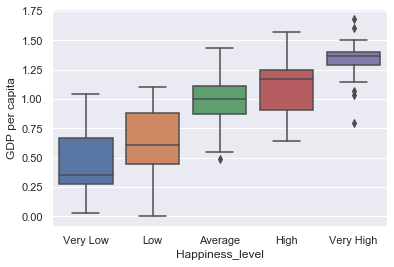

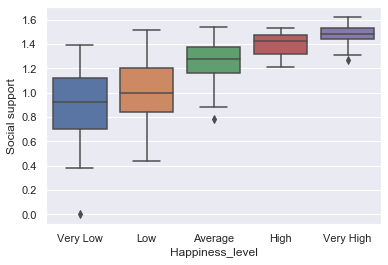

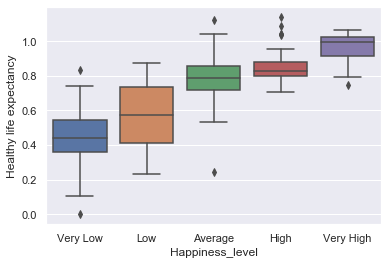

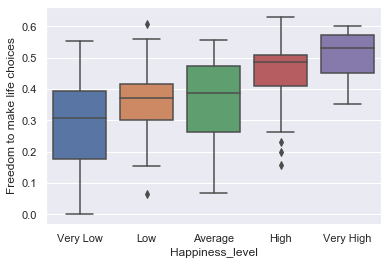

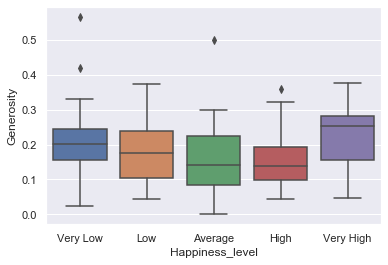

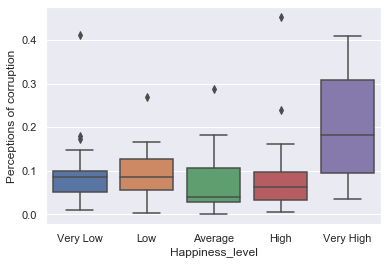

In [13]:
for feature in X.columns[:-1]:

    sns.boxplot(y[::-1], clean_df[feature])
    
    plt.show()

Note: I turned these graphs "on their side" so to speak for visual purposes. Typically I would have the response variable on the y-axis and the explanatory variable(s) on the x-axis. In this case I flipped it so the box plots seemed more intuitive.

What these graphs show is that for features 'GDP per capita', 'Social support', 'Healthy life expectancy', and 'Freedom to make life choices' have a slight positive correlation with the response variable 'Happiness_level'. In other words, as GDP rises, social support improves, healthy life expectancy goes up, and/or there is more freedom to make choices, the happiness level of citizens tends to improve.

But for the features 'Generosity' and 'Perceptions of corruption' there is either no discernable correlation or it is very weak. 'Perceptions of corruption' shows no correlation or perhaps a slight positive one, where very high happiness countries tend to have higher perceptions of corruption, which is a surprising result as it would intuitively seem like it should be the opposite. This could be the result of a couple of outlier countries skewing the results.

### Pre-Process Data

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
X_train.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
26,0.800,1.269,0.746,0.535,0.175,0.078,Americas
134,0.811,1.149,0.000,0.313,0.074,0.135,NaN
79,1.221,1.171,0.828,0.508,0.260,0.024,Asia
131,0.350,0.766,0.192,0.174,0.198,0.078,Africa
36,1.362,1.368,0.871,0.536,0.255,0.110,Asia


In [16]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

categorical_cols = X_train.dtypes == object

numeric_cols = ~categorical_cols

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                        ('encoder', OneHotEncoder(handle_unknown='ignore'))])

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                   ('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[('categorical', categorical_transformer, categorical_cols),
                               ('numeric', numeric_transformer, numeric_cols)])

X_proc = preprocessor.fit_transform(X_train)

In [17]:
# Number of features after pre-processing

X_proc.shape[1]

11

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1')

clf.fit(X_proc, y_train)

model = SelectFromModel(clf, prefit=True)

X_select_feats = model.transform(X_proc)

/Users/seanmcalevey/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/seanmcalevey/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [19]:
# Number of features after automatic feature selection

X_select_feats.shape[1]

10

In [20]:
model.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True])

In [21]:
feature_coefs = []

for i in range(clf.coef_.shape[1]):
    the_mean = np.mean(clf.coef_[:,i])
    feature_coefs.append(the_mean)

In [22]:
pd.DataFrame(feature_coefs, columns=['Coef']).sort_values('Coef', ascending=True)

,Coef
0,-0.469220
5,-0.443501
1,-0.266424
7,-0.256648
2,-0.193922
3,-0.193557
8,-0.193217
9,-0.144467
6,-0.060286
4,0.000000


Using automatic feature selection on our Logistic Regression model returned 10 of the 11 features, leaving 'Generosity' out and keeping all the rest. What that means is that the 'l1' penalty of the logistic regression zeroed out the 'Generosity' feature.

So generosity turns out to be not as important as the rest of the features. The features that are the most important (largest absolute coefficients) are GDP per capita, Perceptions of corruption, and Social support. Indeed, the categorical variable 'region' which was OneHotEncoded to be split into 4 variables, didn't have a feature ranking in the top 3, meaning that region may not be as important a predictor as some of the other numerical variables.

### 3) Run at least three models to predict happiness

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import f1_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### SVC

In [24]:
import warnings

warnings.filterwarnings('ignore')

from sklearn.svm import SVC

pipe = Pipeline([('preprocessor', preprocessor), ('svc', SVC(kernel='rbf'))])

param_grid = {'svc__C': np.logspace(-1,3,5),
             'svc__kernel': ['rbf', 'linear']}

svc_grid = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)

svc_train_score = svc_grid.best_score_

svc_test_score = svc_grid.score(X_test, y_test)

svc_f1 = f1_score(y_test, svc_grid.predict(X_test), average='macro')

svc_precision = precision_score(y_test, svc_grid.predict(X_test), average='macro')

svc_recall = recall_score(y_test, svc_grid.predict(X_test), average='macro')

### MLP

In [25]:
from sklearn.neural_network import MLPClassifier

pipe = Pipeline([('preprocessor', preprocessor), ('mlp', MLPClassifier())])

param_grid = {'mlp__hidden_layer_sizes': [(64,32,16), (32,8,4), (32,16,8)],
             'mlp__alpha': np.logspace(-2,1,4)}

mlp_grid = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)

mlp_train_score = mlp_grid.best_score_

mlp_test_score = mlp_grid.score(X_test, y_test)

mlp_f1 = f1_score(y_test, mlp_grid.predict(X_test), average='macro')

mlp_precision = precision_score(y_test, mlp_grid.predict(X_test), average='macro')

mlp_recall = recall_score(y_test, mlp_grid.predict(X_test), average='macro')

### Gradient Boosting Clf

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

pipe = Pipeline([('preprocessor', preprocessor), ('gb', GradientBoostingClassifier())])

param_grid = {'gb__learning_rate': np.logspace(-3,0,7),
             'gb__max_depth': [2,3,4]}

gb_grid = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)

gb_train_score = gb_grid.best_score_

gb_test_score = gb_grid.score(X_test, y_test)

gb_f1 = f1_score(y_test, gb_grid.predict(X_test), average='macro')

gb_precision = precision_score(y_test, gb_grid.predict(X_test), average='macro')

gb_recall = recall_score(y_test, gb_grid.predict(X_test), average='macro')

### Logistic Regression with L1 Penalty

In [27]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('preprocessor', preprocessor), ('clf', LogisticRegression(penalty='l1'))])

param_grid = {'clf__C': np.logspace(-3,3,13)}

clf_grid = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)

clf_train_score = clf_grid.best_score_

clf_test_score = clf_grid.score(X_test, y_test)

clf_f1 = f1_score(y_test, clf_grid.predict(X_test), average='macro')

clf_precision = precision_score(y_test, clf_grid.predict(X_test), average='macro')

clf_recall = recall_score(y_test, clf_grid.predict(X_test), average='macro')

### DataFrame with Scores

In [47]:
scores_df = pd.DataFrame({'Train score': [svc_train_score, mlp_train_score, gb_train_score, clf_train_score],
             'Test accuracy': [svc_test_score, mlp_test_score, gb_test_score, clf_test_score],
             'Test f1': [svc_f1, mlp_f1, gb_f1, clf_f1],
             'Test precision': [svc_precision, mlp_precision, gb_precision, clf_precision],
             'Test recall': [svc_recall, mlp_recall, gb_recall, clf_recall],
                         'Parameters': [svc_grid.best_params_, mlp_grid.best_params_,
                                       gb_grid.best_params_, clf_grid.best_params_]},
             index=['SVC', 'MLP', 'Gradient Boosting', 'Logistic Regression'])

scores_df.sort_values('Test f1', ascending=False)

,Train score,Test accuracy,Test f1,Test precision,Test recall,Parameters
SVC,0.564103,0.538462,0.536542,0.603175,0.547222,"{'svc__C': 100.0, 'svc__kernel': 'linear'}"
MLP,0.504274,0.461538,0.450205,0.547186,0.475000,"{'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes'..."
Logistic Regression,0.547009,0.410256,0.403571,0.428333,0.430556,{'clf__C': 100.0}
Gradient Boosting,0.589744,0.358974,0.360018,0.436364,0.355556,"{'gb__learning_rate': 0.31622776601683794, 'gb..."


In [51]:
print([i for i in scores_df['Parameters']])

[{'svc__C': 100.0, 'svc__kernel': 'linear'}, {'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (64, 32, 16)}, {'gb__learning_rate': 0.31622776601683794, 'gb__max_depth': 3}, {'clf__C': 100.0}]


For test accuracy, f1, precision, and recall, the best classifier was SVC with a linear kernel and a regularization parameter C=100. The raw accuracy score of 53.8% is good but not great. It may help to add additional features to the analysis. The precision score of 0.603 means that, when the classifier makes a classification, it is correct 60.3% of the time. Recall is a bit harder to interpret with 5 classes, but in general, recall returns a score that is the proportion of ground truth samples correctly classified.

The multilayer perceptron was the 2nd-best classifier, with a test accuracy score of 46.2%, and an f1 score of 0.450. The MLP opted for an alpha parameter (regularization) of 0.01 and hidden_layer_sizes of 64, 32, and 16, which is quite a large network given the limited number of training samples. Nevertheless it scored quite well; perhaps as a result of the regularization parameter working to keep it from overfitting.

The 3rd-best classifier was Logistic Regression with a regularization parameter C=100, which incidentally was the same as the SVC with linear kernel. The worst classifier of the four tried was Gradient Boosting with a learning rate of 0.316 and max_depth of 3 (which limits the depth of each tree in the ensemble to prevent overfitting). I was suprised Gradient Boosting didn't do better. Perhaps further tuning of the hyperparameters would have further assisted it, since it had the highest training score relative to its test metrics, which can indicate overfitting.

### Submitting the Model to AI Leaderboard

In [32]:
import pickle

pickle.dump(svc_grid, open('svc_classifier.pkl', 'wb'))

In [33]:
#install aimodelshare library
! pip3 install https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.2.tar.gz?raw=true

  Created wheel for aimodelshare: filename=aimodelshare-0.0.2-py3-none-any.whl size=5374 sha256=9002cea530611c266b6c3b0046fef574597856d775ffe87935ab6f04e648ead6
  Stored in directory: /Users/seanmcalevey/Library/Caches/pip/wheels/c7/e5/47/34582833cad70672aaefaee3b37abb19a611b9a89705890dd6
Successfully built aimodelshare


In [40]:
# Now we can extract some evaluative metrics to use for model submission

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification=True):
     if classification==True:
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro")#,zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro")#,zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro")#,zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

#model_eval_metrics( y_test,predicted_labels,classification="TRUE")

In [41]:
modelevalobject = model_eval_metrics(y_test, svc_grid.predict(X_test), classification=True)

In [42]:
# Example Model Pre-launched into Model Share Site
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = ""
password = ""

region='us-east-1'
model_filepath="svc_classifier.pkl"   
preprocessor_filepath="preprocessor.pkl"
preprocessor="TRUE"

trainingdata=X_train

# Set aws keys for this project (these keys give you access to collaborate on a single project)

#Importing from object that stores keys so we do not print out keys for others to see.

aws_key_password_region = pickle.load( open( "downloads/worldhappiness_modelsubmission_keys.pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

In [43]:
# Submit your model using submit_model() function
# Works with models and preprocessors. 
import aimodelshare as ai

ai.submit_model(model_filepath=model_filepath, model_eval_metrics=modelevalobject,apiurl=apiurl, username=username, password=password, aws_key=aws_key,aws_password=aws_password, region=region, trainingdata=trainingdata,preprocessor_filepath=preprocessor_filepath,preprocessor=preprocessor)

Please review model details and then resubmit to update this model.


In [44]:
# arguments required to get leaderboard below
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = ""
password = ""

In [45]:
import aimodelshare as ai

leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)

LEADERBOARD RANKINGS:


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2,username,model_version,avg_ranking_classification,avg_ranking_regression
68,0.717949,0.717857,0.717857,0.727778,0,0,0,0,3scman,85,2.333333,1.0
48,0.717949,0.713796,0.719444,0.725000,0,0,0,0,3scman,70,2.333333,1.0
82,0.666667,0.675975,0.754286,0.700952,0,0,0,0,dhoward97,69,2.666667,1.0
21,0.692308,0.693333,0.700397,0.702778,0,0,0,0,3scman,62,4.000000,1.0
78,0.641026,0.642381,0.743590,0.682273,0,0,0,0,SUN-Wenjun,83,4.000000,1.0
24,0.641026,0.646886,0.738333,0.680952,0,0,0,0,dhoward97,68,4.000000,1.0
99,0.641026,0.639160,0.660476,0.700455,0,0,0,0,SUN-Wenjun,82,6.333333,1.0
58,0.641026,0.639160,0.660476,0.700455,0,0,0,0,SUN-Wenjun,81,6.333333,1.0
37,0.615385,0.620793,0.634394,0.658636,0,0,0,0,SUN-Wenjun,79,7.666667,1.0
62,0.615385,0.620793,0.634394,0.658636,0,0,0,0,SUN-Wenjun,80,7.666667,1.0
